In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.models import Sequential

In [3]:
from keras.layers import Dense,LSTM,Dropout

In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
df = pd.read_csv("/content/Google_Stock_Price_Train.csv")
df.head(2)

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"


In [20]:
dataset_test = pd.read_csv("/content/Google_Stock_Price_Test.csv")
dataset_test.head(2)

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"


In [7]:
training_data = df.iloc[:,1:2].values
training_data

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [8]:
sc = MinMaxScaler(feature_range=(0,1))

In [9]:
training_set_scaled = sc.fit_transform(training_data)

In [32]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [10]:
x_train = []
y_train = []
for i in range (60,1258):
  x_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])

In [11]:
x_train,y_train = np.array(x_train),np.array(y_train)

In [12]:
x_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [13]:
y_train

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

In [14]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [15]:
x_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

In [16]:
regressor_stock = Sequential()

In [18]:
regressor_stock.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))

regressor_stock.add(Dropout(0.2))
regressor_stock.add(LSTM(units=50,return_sequences=True))

regressor_stock.add(Dropout(0.2))
regressor_stock.add(LSTM(units=50,return_sequences=True))

regressor_stock.add(Dropout(0.2))
regressor_stock.add(LSTM(units=50))

regressor_stock.add(Dropout(0.2))
regressor_stock.add(Dense(units=1))


In [19]:
regressor_stock.compile(optimizer='adam',loss='mean_absolute_error')
regressor_stock.fit(x_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
38/38 [==============================] - 18s 171ms/step - loss: 0.1261
Epoch 2/100
38/38 [==============================] - 8s 199ms/step - loss: 0.0644
Epoch 3/100
38/38 [==============================] - 6s 165ms/step - loss: 0.0626
Epoch 4/100
38/38 [==============================] - 8s 199ms/step - loss: 0.0571
Epoch 5/100
38/38 [==============================] - 8s 200ms/step - loss: 0.0572
Epoch 6/100
38/38 [==============================] - 11s 283ms/step - loss: 0.0607
Epoch 7/100
38/38 [==============================] - 9s 229ms/step - loss: 0.0582
Epoch 8/100
38/38 [==============================] - 6s 167ms/step - loss: 0.0505
Epoch 9/100
38/38 [==============================] - 8s 199ms/step - loss: 0.0476
Epoch 10/100
38/38 [==============================] - 7s 189ms/step - loss: 0.0527
Epoch 11/100
38/38 [==============================] - 10s 263ms/step - loss: 0.0451
Epoch 12/100
38/38 [==============================] - 12s 320ms/step - loss: 0.0515
Epoch 13/

In [21]:
real_stock_price = dataset_test.iloc[:,1:2].values

In [22]:
dataset_total = pd.concat((df['Open'],dataset_test['Open']),axis=0)

In [33]:
len(dataset_total)

1278

In [36]:
len(dataset_test)

20

In [23]:
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values

In [24]:
inputs

array([779.  , 779.66, 777.71, 786.66, 783.76, 781.22, 781.65, 779.8 ,
       787.85, 798.24, 803.3 , 795.  , 804.9 , 816.68, 806.34, 801.  ,
       808.35, 795.47, 782.89, 778.2 , 767.25, 750.66, 774.5 , 783.4 ,
       779.94, 791.17, 756.54, 755.6 , 746.97, 755.2 , 766.92, 771.37,
       762.61, 772.63, 767.73, 764.26, 760.  , 771.53, 770.07, 757.44,
       744.59, 757.71, 764.73, 761.  , 772.48, 780.  , 785.04, 793.9 ,
       797.4 , 797.34, 800.4 , 790.22, 796.76, 795.84, 792.36, 790.9 ,
       790.68, 793.7 , 783.33, 782.75, 778.81, 788.36, 786.08, 795.26,
       806.4 , 807.86, 805.  , 807.14, 807.48, 807.08, 805.81, 805.12,
       806.91, 807.25, 822.3 , 829.62, 837.81, 834.71, 814.66, 796.86])

In [25]:
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
inputs

array([[0.9299055 ],
       [0.93113327],
       [0.92750577],
       [0.94415507],
       [0.93876032],
       [0.93403527],
       [0.93483518],
       [0.9313937 ],
       [0.94636878],
       [0.96569685],
       [0.97510976],
       [0.95966962],
       [0.97808617],
       [1.        ],
       [0.98076494],
       [0.97083116],
       [0.98450406],
       [0.96054394],
       [0.9371419 ],
       [0.92841729],
       [0.90804747],
       [0.8771858 ],
       [0.92153434],
       [0.93809063],
       [0.93165414],
       [0.95254483],
       [0.88812412],
       [0.88637547],
       [0.87032145],
       [0.88563137],
       [0.90743359],
       [0.91571173],
       [0.89941588],
       [0.91805566],
       [0.9089404 ],
       [0.9024853 ],
       [0.89456061],
       [0.91600938],
       [0.9132934 ],
       [0.88979835],
       [0.86589404],
       [0.89030062],
       [0.90335962],
       [0.89642086],
       [0.91777662],
       [0.93176576],
       [0.94114145],
       [0.957

In [27]:
x_test = []
for i in range(60,80):
  x_test.append(inputs[i-60:i,0])

x_test = np.array(x_test)
x_test

array([[0.9299055 , 0.93113327, 0.92750577, ..., 0.95725128, 0.93796041,
        0.93688146],
       [0.93113327, 0.92750577, 0.94415507, ..., 0.93796041, 0.93688146,
        0.92955205],
       [0.92750577, 0.94415507, 0.93876032, ..., 0.93688146, 0.92955205,
        0.94731751],
       ...,
       [0.96054394, 0.9371419 , 0.92841729, ..., 1.01045465, 1.02407173,
        1.03930724],
       [0.9371419 , 0.92841729, 0.90804747, ..., 1.02407173, 1.03930724,
        1.03354044],
       [0.92841729, 0.90804747, 0.8771858 , ..., 1.03930724, 1.03354044,
        0.99624228]])

In [28]:
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [29]:
predicted_stock_price = regressor_stock.predict(x_test)

1/1 [==============================] - 2s 2s/step


In [30]:
real_predictions = sc.inverse_transform(predicted_stock_price)

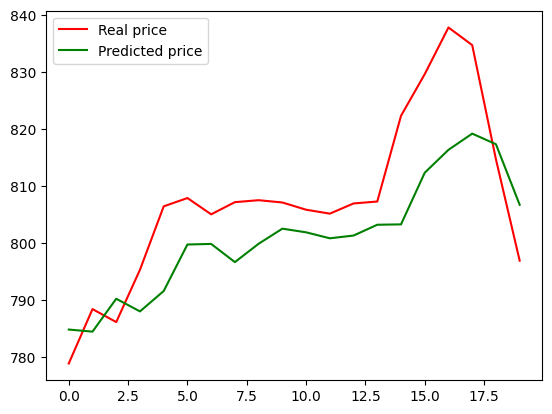

In [31]:
plt.plot(real_stock_price,c='r',label="Real price")
plt.plot(real_predictions,c='g',label="Predicted price")
plt.legend()